# Blog Gender feature filtering and classification

## Importing Data from csv 

In [77]:
import pandas as pd

data = pd.read_csv('Data\Gender_Blog.csv')  

In [78]:
data.shape


(19320, 3)

##  Labelling comlumns and dropping data due to limited resources

In [79]:
data.head
#Now we can name our own columns
data.columns = ['ID', 'Gender', 'Blog']

data.drop(data.tail(16320).index,inplace=True) 


In [80]:
data.head

<bound method NDFrame.head of         ID  Gender                                               Blog
0        0    male  ['\r\n\r\n     \r\n       Well this is my firs...
1        1  female  ["\r\n\r\n\t \r\n          Yes  !     Finally,...
2        2    male  ['\r\n\r\n    \r\n       Yes my overworked bod...
3        3    male  ["\r\n\r\n     \r\n      tennis has always bee...
4        4  female  ["\r\n\r\n\t \r\n      hello. How are you? I'm...
...    ...     ...                                                ...
2995  2995  female  ['\r\n\r\n\t \r\n      I saw Jeff again Sunday...
2996  2996    male  ['\r\n\r\r\n\r\r\n           \r\r\n       Clea...
2997  2997  female  ["\r\n\r\n\t \r\n      Well, so you lot have s...
2998  2998    male  ["\r\n\r\n\r\n       \r\n      Hello everyone....
2999  2999  female  ['\r\n\r\n\t \r\n      Hello.  I have to keep ...

[3000 rows x 3 columns]>

## Adding Blog length data

In [81]:
data.head
data['blog_length']  = data['Blog'].str.len()

#df["blog_length"].mean()
male = data[data['Gender']== 'male'] 
female = data[data['Gender']== 'female'] 


In [82]:
male.head
female.head


<bound method NDFrame.head of         ID  Gender                                               Blog  \
1        1  female  ["\r\n\r\n\t \r\n          Yes  !     Finally,...   
4        4  female  ["\r\n\r\n\t \r\n      hello. How are you? I'm...   
8        8  female  ['\r\n\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t    I\'v...   
9        9  female  ['\r\n\r\n\t \r\n      How can you drop a raw ...   
12      12  female  ['\r\n\r\n    \r\n       \r\n      hey ya\'ll!...   
...    ...     ...                                                ...   
2992  2992  female  ['\r\n\r\n\t \r\n      Well, been working from...   
2993  2993  female  ["\r\n\r\n\r\n       \r\n      Today, it hasn'...   
2995  2995  female  ['\r\n\r\n\t \r\n      I saw Jeff again Sunday...   
2997  2997  female  ["\r\n\r\n\t \r\n      Well, so you lot have s...   
2999  2999  female  ['\r\n\r\n\t \r\n      Hello.  I have to keep ...   

      blog_length  
1            4574  
4           16902  
8           10040  
9           5

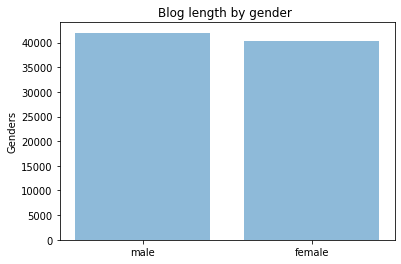

[42002.22171353826, 40258.983684568324]


In [83]:
objects = ('male', 'female')
y_pos = np.arange(len(objects))
performance = [male["blog_length"].mean(), female["blog_length"].mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Genders')
plt.title('Blog length by gender ')

plt.show()

print(performance)

## Computing readabilty

55.95250000000002


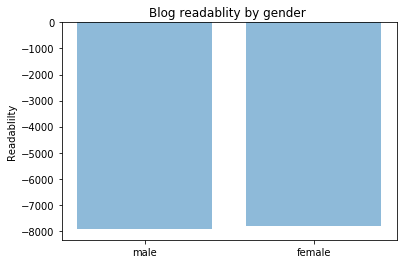

-7942.447807842614 -7822.986412130421


In [100]:
import readability
text = ('This is an example sentence .\n'
   'Note that tokens are separated by spaces and sentences by newlines .\n')
results = readability.getmeasures(text, lang='en')
print(results['readability grades']['FleschReadingEase'])

readablitlyMale = readability.getmeasures(male["Blog"], lang='en')
readablitlyFemale = readability.getmeasures(female["Blog"], lang='en')



objects = ('male', 'female')
y_pos = np.arange(len(objects))
performance = readablitlyMale['readability grades']['FleschReadingEase'],readablitlyFemale['readability grades']['FleschReadingEase']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Readablilty')
plt.title('Blog readablity by gender ')

plt.show()

print(readablitlyMale['readability grades']['FleschReadingEase'],readablitlyFemale['readability grades']['FleschReadingEase'])

## Visualising Data

In [84]:
import numpy as np
#Use numpy to find unique polarity vals and count them
unique, counts = np.unique(data['Gender'], return_counts=True) 

In [85]:
#Now create a temporary pandas frame with these values and frequencies
Gen = pd.DataFrame({'Gender': unique, 'frequency': counts})

In [86]:
Gen

,Gender,frequency
0,female,1471
1,male,1529


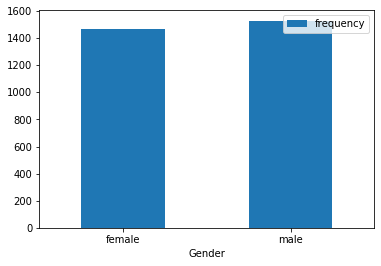

In [87]:
import matplotlib.pyplot as plt
#and plot
Gen.plot.bar(x='Gender', y='frequency', rot=0)

## Splitting Test and train data

In [88]:
from sklearn.model_selection import train_test_split
#random_state param is just a random number seed
train, test = train_test_split(data, test_size = 0.2, random_state=42)

In [89]:
print("Train",len(train))
print("Test",len(test))

Train 2400
Test 600


In [90]:
data.head


<bound method NDFrame.head of         ID  Gender                                               Blog  \
0        0    male  ['\r\n\r\n     \r\n       Well this is my firs...   
1        1  female  ["\r\n\r\n\t \r\n          Yes  !     Finally,...   
2        2    male  ['\r\n\r\n    \r\n       Yes my overworked bod...   
3        3    male  ["\r\n\r\n     \r\n      tennis has always bee...   
4        4  female  ["\r\n\r\n\t \r\n      hello. How are you? I'm...   
...    ...     ...                                                ...   
2995  2995  female  ['\r\n\r\n\t \r\n      I saw Jeff again Sunday...   
2996  2996    male  ['\r\n\r\r\n\r\r\n           \r\r\n       Clea...   
2997  2997  female  ["\r\n\r\n\t \r\n      Well, so you lot have s...   
2998  2998    male  ["\r\n\r\n\r\n       \r\n      Hello everyone....   
2999  2999  female  ['\r\n\r\n\t \r\n      Hello.  I have to keep ...   

      blog_length  
0           16671  
1            4574  
2            9110  
3           1

## Features of Trigrams and lower order n grams with NB Bernoulli classifier

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
counterSt = CountVectorizer(ngram_range=(1, 3))

ngramsFeat = counterSt.fit_transform(train['Blog'])


from sklearn.naive_bayes import BernoulliNB

#Returns a fitter (trained) classifier
nb_classifierSt = BernoulliNB().fit(ngramsFeat, train['Gender'])


In [92]:
test_featuresSt = counterSt.transform(test['Blog'])

predictionsSt = nb_classifierSt.predict(test_featuresSt)

from sklearn import metrics
print(metrics.classification_report(test['Gender'], predictionsSt))

              precision    recall  f1-score   support

      female       0.70      0.28      0.40       306
        male       0.54      0.87      0.67       294

    accuracy                           0.57       600
   macro avg       0.62      0.58      0.53       600
weighted avg       0.62      0.57      0.53       600



## Features of Trigrams only with NB Bernoulli classifier

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
counterSt3 = CountVectorizer(ngram_range=(3, 3))

ngramsFeat3 = counterSt3.fit_transform(train['Blog'])


from sklearn.naive_bayes import BernoulliNB

#Returns a fitter (trained) classifier
nb_classifierSt3 = BernoulliNB().fit(ngramsFeat3, train['Gender'])

In [94]:
test_featuresSt3 = counterSt3.transform(test['Blog'])

predictionsSt3 = nb_classifierSt3.predict(test_featuresSt3)

from sklearn import metrics
print(metrics.classification_report(test['Gender'], predictionsSt3))

              precision    recall  f1-score   support

      female       0.70      0.19      0.29       306
        male       0.52      0.91      0.66       294

    accuracy                           0.54       600
   macro avg       0.61      0.55      0.48       600
weighted avg       0.61      0.54      0.47       600



## Features of n grams (n=4) with NB Bernoulli classifier

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
counterSt4 = CountVectorizer(ngram_range=(4, 4))

ngramsFeat4 = counterSt4.fit_transform(train['Blog'])


#Returns a fitter (trained) classifier
nb_classifierSt4 = BernoulliNB().fit(ngramsFeat4, train['Gender'])

test_featuresSt4 = counterSt4.transform(test['Blog'])

predictionsSt4 = nb_classifierSt4.predict(test_featuresSt4)

from sklearn import metrics
print(metrics.classification_report(test['Gender'], predictionsSt4))

              precision    recall  f1-score   support

      female       0.65      0.04      0.08       306
        male       0.49      0.98      0.66       294

    accuracy                           0.50       600
   macro avg       0.57      0.51      0.37       600
weighted avg       0.57      0.50      0.36       600



## Features of single charachter n grams with NB Bernoulli classifier

In [96]:

from sklearn.feature_extraction.text import CountVectorizer
counterChars = CountVectorizer(ngram_range=(1, 1),analyzer='char_wb')

ngramsFeatChars = counterChars.fit_transform(train['Blog'])


#Returns a fitter (trained) classifier
nb_classifierchars = BernoulliNB().fit(ngramsFeatChars, train['Gender'])

test_featuresChars = counterChars.transform(test['Blog'])

predictionsChars = nb_classifierchars.predict(test_featuresChars)

from sklearn import metrics
print(metrics.classification_report(test['Gender'], predictionsChars))

              precision    recall  f1-score   support

      female       0.65      0.59      0.62       306
        male       0.61      0.66      0.64       294

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



## Features of bi and single character ngrams with NB Bernoulli classifier

In [97]:

from sklearn.feature_extraction.text import CountVectorizer
counterChars2 = CountVectorizer(ngram_range=(1, 2),analyzer='char_wb')

ngramsFeatChars2 = counterChars2.fit_transform(train['Blog'])


#Returns a fitter (trained) classifier
nb_classifierchars2 = BernoulliNB().fit(ngramsFeatChars2, train['Gender'])

test_featuresChars2 = counterChars2.transform(test['Blog'])

predictionsChars2 = nb_classifierchars2.predict(test_featuresChars2)

from sklearn import metrics
print(metrics.classification_report(test['Gender'], predictionsChars2))

              precision    recall  f1-score   support

      female       0.69      0.57      0.62       306
        male       0.62      0.73      0.67       294

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600



## Features unigrams (stop words removed) with NB Bernoulli classifier

In [98]:

counterUni = CountVectorizer(stop_words='english')

train_features= counterUni.fit_transform(train['Blog'])


#Returns a fitter (trained) classifier
nb_classifierUni = BernoulliNB().fit(train_features, train['Gender'])

test_features = counterUni.transform(test['Blog'])

predictions = nb_classifierUni.predict(test_features)

print(metrics.classification_report(test['Gender'], predictions))

              precision    recall  f1-score   support

      female       0.69      0.60      0.65       306
        male       0.64      0.72      0.68       294

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.67      0.66      0.66       600



## Features of unigrams (default params )with NB Bernoulli classifier

In [99]:

counterNoS = CountVectorizer()

train_featuresN= counterNoS.fit_transform(train['Blog'])


#Returns a fitter (trained) classifier
nb_classifierNS = BernoulliNB().fit(train_featuresN, train['Gender'])

test_featuresN = counterNoS.transform(test['Blog'])

predictionsN = nb_classifierNS.predict(test_featuresN)

from sklearn import metrics
print(metrics.classification_report(test['Gender'], predictionsN))

              precision    recall  f1-score   support

      female       0.68      0.58      0.63       306
        male       0.62      0.72      0.67       294

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600

